Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras

Loading and Preparing Data

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
print("X_train Shape:",x_train.shape)
print("X_test Shape:",x_test.shape)

X_train Shape: (60000, 28, 28)
X_test Shape: (10000, 28, 28)


In [5]:
print("Image Matrix of 0th image:\n",x_train[0])

Image Matrix of 0th image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 21

Visualization of Image:


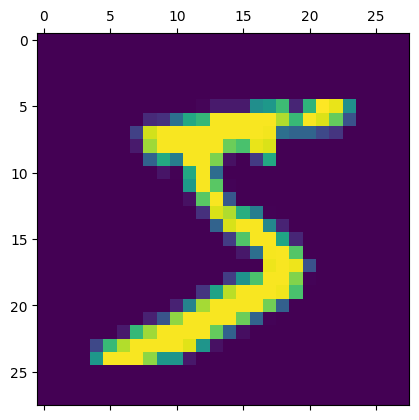

In [9]:
print("Visualization of Image:")
plt.matshow(x_train[0])

normalize data by scaling pixel intensities to 0-1 range

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
print("Image Matrix of 0th image after normalization:\n",x_train[0])

Image Matrix of 0th image after normalization:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

Creating a Model

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [15]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

Train the model

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7391 - loss: 1.0215 - val_accuracy: 0.9029 - val_loss: 0.3560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9022 - loss: 0.3505 - val_accuracy: 0.9192 - val_loss: 0.2922
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2912 - val_accuracy: 0.9268 - val_loss: 0.2598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9264 - loss: 0.2656 - val_accuracy: 0.9333 - val_loss: 0.2371
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9332 - loss: 0.2391 - val_accuracy: 0.9366 - val_loss: 0.2192
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9394 - loss: 0.2179 - val_accuracy: 0.9408 - val_loss: 0.2033
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.2011 - val_accuracy: 0.9442 - val_loss: 0.1920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9488 - loss: 0.1863 - 

Evaluate the Model

In [18]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("Loss:",test_loss)
print("Accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9447 - loss: 0.1879
Loss: 0.16091467440128326
Accuracy: 0.9531000256538391


Prediction on new Data

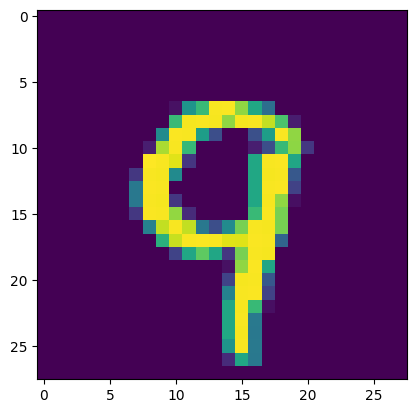

In [26]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [29]:
predicted_value = model.predict(x_test)
print("Handwritten Number in Image is: {}".format(np.argmax(predicted_value[n])))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Handwritten Number in Image is: 9


Plot the Accuracy and Loss

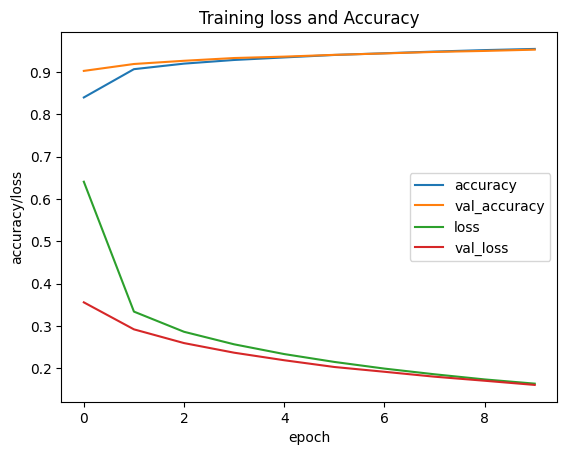

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training loss and Accuracy")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy","val_accuracy","loss","val_loss"])
plt.show()